In [50]:
import os
import pandas as pd
cwd = os.getcwd()
print(cwd)
places = pd.read_csv("CleanBangalore.csv")
#Most of my variables are boolean. I am going to introduce variables that count the number of different features based on the major 4 categories
#funiture, fitness, appliances, and entertainment

places["Furniture"] = places["BED"] + places["Sofa"] + places["Wardrobe"] + places["DiningTable"]
places["Fitness"] = places["Gymnasium"] + places["SwimmingPool"] + places["JoggingTrack"] + places["SportsFacility"] + places["GolfCourse"]
places["Appliances"] = places["Refrigerator"] + places["Microwave"] + places["TV"] + places["WashingMachine"] + places["AC"]
places["Entertain"] = places["IndoorGames"] + places["ShoppingMall"] + places["Cafeteria"] + places["Children.splayarea"]


C:\Users\Tom


0

In [ ]:
#check if there are NAs
places.isnull().sum().sum()

In [ ]:
#zero NAs
places['Wifi'].sum()
#check if there are houses with Wifi

In [ ]:
places['Wardrobe'].sum()
#check if there are houses with Wardrobes

In [ ]:
#drop Wifi and Wardrobe from data since there is no data
places.drop(columns=['Wifi', 'Wardrobe'])

places.head()

In [ ]:
# I want review the correlations between variables to see if there is multicollinearity in my data before I run the regression
places.corr()

In [37]:
import scipy.stats as stats

stats.f_oneway(places['Price'][places['Region'] == 'Central'],
               places['Price'][places['Region'] == 'West'],
               places['Price'][places['Region'] == 'Southeast'],
               places['Price'][places['Region'] == 'East'],
               places['Price'][places['Region'] == 'Northeast'],
               places['Price'][places['Region'] == 'North'],
               places['Price'][places['Region'] == 'South'])


F_onewayResult(statistic=18.489207578925882, pvalue=5.743649647901988e-21)

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Price ~ C(Region)', data=places).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Region),1.834667e+16,6.0,18.489208,5.743650e-21
Residual,3.057910e+17,1849.0,NaN,NaN


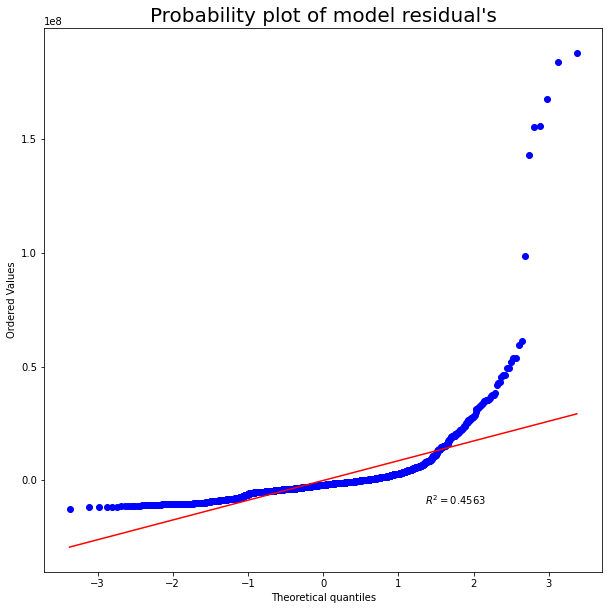

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [40]:
stats.levene(places['Price'][places['Region'] == 'Central'],
               places['Price'][places['Region'] == 'West'],
               places['Price'][places['Region'] == 'Southeast'],
               places['Price'][places['Region'] == 'East'],
               places['Price'][places['Region'] == 'Northeast'],
               places['Price'][places['Region'] == 'North'],
               places['Price'][places['Region'] == 'South'])

LeveneResult(statistic=16.164134399434975, pvalue=3.3034286802915356e-18)

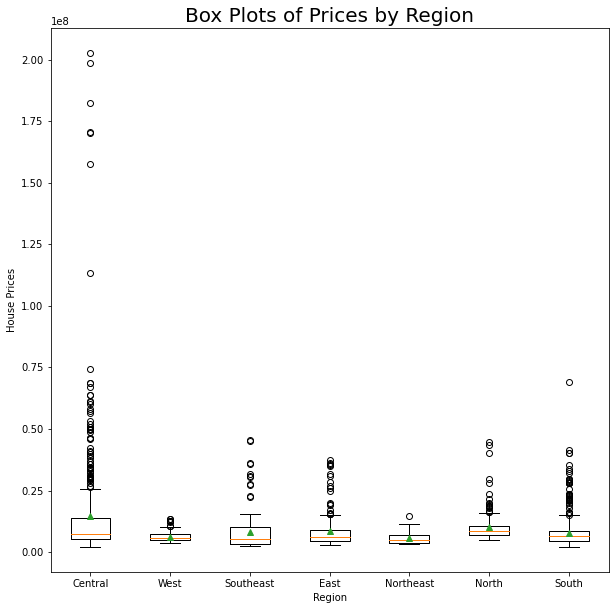

In [41]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plots of Prices by Region", fontsize= 20)
ax.set

data = [  places['Price'][places['Region'] == 'Central'],
               places['Price'][places['Region'] == 'West'],
               places['Price'][places['Region'] == 'Southeast'],
               places['Price'][places['Region'] == 'East'],
               places['Price'][places['Region'] == 'Northeast'],
               places['Price'][places['Region'] == 'North'],
               places['Price'][places['Region'] == 'South']]

ax.boxplot(data,
           labels= ['Central','West', 'Southeast', 'East', 'Northeast', 'North', 'South'],
           showmeans= True)

plt.xlabel("Region")
plt.ylabel("House Prices")

plt.show()

In [42]:
import statsmodels.formula.api as smf
#smf.ols(Price~Area+Region+No..of.Bedrooms+Fitness+Appliances+Furniture+RainWaterHarvesting+School+VaastuCompliant+Intercom+LiftAvailable+ShoppingMall+ATM+PowerBackup+MultipurposeRoom+CarParking+LandscapedGardens,
        #data = places).fit()
model = smf.ols("Price~Area+Region+Bedrooms+Fitness+Appliances+Furniture+RainWaterHarvesting+School+VaastuCompliant+Intercom+LiftAvailable+ShoppingMall+ATM+PowerBackup+MultipurposeRoom+CarParking+LandscapedGardens",
        data = places).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     517.9
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        17:04:52   Log-Likelihood:                -31232.
No. Observations:                1856   AIC:                         6.251e+04
Df Residuals:                    1833   BIC:                         6.264e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -7.26e+06   6.68e+05    -10.860      0.000   -8.57e+06   -5.95e+06
Region[T.East]      -1.213e+06   4.57e+05     -2.652      0.008   -2.11e+06   -3.16e+05
Region[T.North]      8.856e+05   4.56e+05      1.944      0.052   -7819.952    1.78e+06
Region[T.Northeast] -8.932e+04   9.97e+05     -0.090      0.929   -2.04e+06    1.87e+06
Region[T.South]     -9.045e+05   3.16e+05     -2.867      0.004   -1.52e+06   -2.86e+05
Region[T.Southeast] -1.182e+06   5.02e+05     -2.357      0.019   -2.17e+06   -1.99e+05
Region[T.West]       1.933e+05   5.19e+05      0.372      0.710   -8.24e+05    1.21e+06
Area                 1.744e+04    218.881     79.679      0.000     1.7e+04    1.79e+04
Bedrooms             -3.87e+06   2.43e+05    -15.948      0.000   -4.35e+06   -3.39e+06
Fitness              5.621e+05   1.37e+05      4.088      0.000    2.92e+05    8.32e+05
Appliances           2.781e+06   1.93e+06      1.444      0.149   -9.96e+05    6.56e+06
Furniture           -4.711e+06   3.21e+06     -1.468      0.142    -1.1e+07    1.58e+06
RainWaterHarvesting  2.551e+06   3.22e+05      7.913      0.000    1.92e+06    3.18e+06
School              -3.151e+06   5.21e+05     -6.052      0.000   -4.17e+06   -2.13e+06
VaastuCompliant     -1.088e+06      3e+05     -3.626      0.000   -1.68e+06   -4.99e+05
Intercom              1.04e+06   3.29e+05      3.163      0.002    3.95e+05    1.68e+06
LiftAvailable       -2.344e+06    3.9e+05     -6.012      0.000   -3.11e+06   -1.58e+06
ShoppingMall         3.095e+06   5.45e+05      5.680      0.000    2.03e+06    4.16e+06
ATM                 -1.676e+06   4.68e+05     -3.579      0.000   -2.59e+06   -7.58e+05
PowerBackup          2.312e+06   5.26e+05      4.395      0.000    1.28e+06    3.34e+06
MultipurposeRoom    -4.551e+05   3.07e+05     -1.482      0.138   -1.06e+06    1.47e+05
CarParking           8.384e+05   2.88e+05      2.908      0.004    2.73e+05     1.4e+06
LandscapedGardens   -4.113e+06   3.32e+05    -12.389      0.000   -4.76e+06   -3.46e+06
==============================================================================
Omnibus:                     1649.210   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146093.125
Skew:                           3.743   Prob(JB):                         0.00
Kurtosis:                      45.815   Cond. No.                     5.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
places.corr()

,Unnamed: 0,Price,Area,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Furniture,Fitness,Appliances,Entertain
Unnamed: 0,1.000000,0.064850,0.063071,0.051480,0.212599,-0.000520,0.088414,0.055945,-0.058220,-0.038571,...,-0.007931,0.057311,0.057311,0.057311,NaN,0.057311,0.058585,0.123987,0.057954,0.057296
Price,0.064850,1.000000,0.904116,0.529604,-0.083060,0.011691,0.080747,0.149025,-0.015412,0.148941,...,0.082279,0.131400,0.131400,0.131400,NaN,0.131400,0.132249,0.212432,0.131750,0.084318
Area,0.063071,0.904116,1.000000,0.703648,-0.057367,-0.011042,0.095665,0.176819,0.069409,0.197000,...,0.128294,0.149772,0.149772,0.149772,NaN,0.149772,0.151318,0.258892,0.150501,0.104897
Bedrooms,0.051480,0.529604,0.703648,1.000000,-0.036357,-0.005001,0.161577,0.239856,0.123234,0.181781,...,0.077818,0.128101,0.128101,0.128101,NaN,0.128101,0.129221,0.272652,0.129264,0.116312
Resale,0.212599,-0.083060,-0.057367,-0.036357,1.000000,-0.040656,0.052512,-0.029657,0.047874,0.041776,...,-0.050555,-0.114466,-0.114466,-0.114466,NaN,-0.114466,-0.114962,0.126538,-0.115000,-0.025774
MaintenanceStaff,-0.000520,0.011691,-0.011042,-0.005001,-0.040656,1.000000,0.110711,0.109417,0.220479,0.228132,...,-0.000489,0.081110,0.081110,0.081110,NaN,0.081110,0.080479,0.234246,0.081497,0.309900
Gymnasium,0.088414,0.080747,0.095665,0.161577,0.052512,0.110711,1.000000,0.475957,0.325285,0.373575,...,0.056078,0.074834,0.074834,0.074834,NaN,0.074834,0.075299,0.672130,0.075324,0.456216
SwimmingPool,0.055945,0.149025,0.176819,0.239856,-0.029657,0.109417,0.475957,1.000000,0.441658,0.457921,...,0.084480,0.136364,0.136364,0.136364,NaN,0.136364,0.137059,0.766723,0.137105,0.544429
LandscapedGardens,-0.058220,-0.015412,0.069409,0.123234,0.047874,0.220479,0.325285,0.441658,1.000000,0.622265,...,0.062166,0.053473,0.053473,0.053473,NaN,0.053473,0.051092,0.519650,0.052506,0.453191
JoggingTrack,-0.038571,0.148941,0.197000,0.181781,0.041776,0.228132,0.373575,0.457921,0.622265,1.000000,...,0.103524,0.024482,0.024482,0.024482,NaN,0.024482,0.021946,0.692734,0.023387,0.537071
